### Table of Contents

## 12. <a id="top" name='top'>K-Means clustering</a>

<a href='#intro'>12.1 Introduction to K-mean clustering</a>
> <a href='#applications'>12.1.1 Applications of K-means</a><br>
> <a href='#intuition'>12.1.2 Intuition</a><br>
> <a href='#k-value'>12.1.3 Choosing K-values and Elbow method</a><br>

<a href='#dataset'>12.2 The dataset</a>
> <a href='#import'>12.2.1 Loading dataset and importing libraries</a><br>
> <a href='#eda'>12.2.2 Exploratory Data analysis</a><br>
> <a href='#split'>12.2.3 Splitting the dataset and encoding categorical variables</a><br>
> <a href='#feature-scaling'>12.2.4 Feature Scaling</a><br>

<a href="#Model-training">12.3 Model Training</a>
> <a href='#model-2'>12.3.1 Model with 2 clusters</a><br>
> <a href='#checking'>12.3.2 Checking the quality of weak classification by the model</a><br>
> <a href='#optimal'>12.3.3 Finding Optimal number of clusters using Elbow method</a><br>
> <a href='#cluster'>12.3.4 Model with different clusters</a><br>


## <a id='intro' name="intro">12.1 Introduction to K-mean clustering</a>

So far we have learned only supervised learning algorithms and dealt with their problems. We solved the datasets having target variables. What if the dataset does not have target variables? Here comes the unsupervised algorithms. Unsupervised algorithms come into action if the dataset contains no labeled data. If no target variables are present in the data set, we use unsupervised learning algorithms.

In this chapter, we are going to learn about one of the most popular algorithms in unsupervised learning which is "**K-means clustering** ".

K-means is used when there is unlabeled data is given to us. This algorithm classifies the new data points into **clusters** based on the feature similarity. It has k groups divided and the new data point is assigned to any one of them based on feature similarity. Check the below diagram for a simple understanding of K-means clustering.

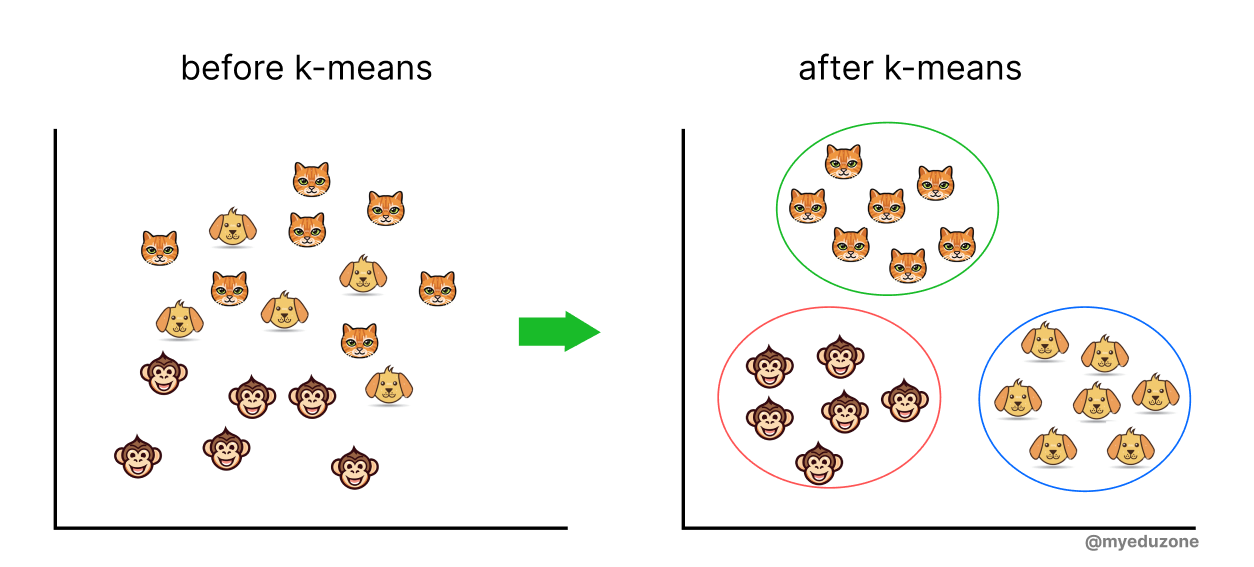

### <a id='applications' name='applications'>12.1.1 Applications of K-means</a>

<a href='#top'>⇑ Table of contents</a>

K-Means clustering is the most common unsupervised machine learning algorithm. It is widely used for many applications which include-

- Image segmentation

- Customer segmentation

- Species clustering

- Anomaly detection

- Clustering languages

### <a id='intuition' name='intuition'>12.1.2 Intuition</a>

<a href='#top'>⇑ Table of contents</a>

The main purpose of k-means is to find the intrinsic groups from the unlabeled data and draw insights from them. It uses the **centroid** method for the clustering process.

The centroid is the data point which is at the center of the cluster. Every new data point's centroid is calculated with each cluster's centroid. And the new data point is classified as that cluster whose centroid distance is much less. The K-Means clustering algorithm uses an iterative procedure to deliver a final result. The algorithm requires number of clusters K and the data set as input. The data set is a collection of features for each data point. The algorithm starts with initial estimates for the K centroids. The algorithm then iterates between two steps:-

1. **Data assignment step**
> Each centroid defines one of the clusters. In this step, each data point is assigned to its nearest centroid, which is based on the **squared Euclidean distance**. So, if **Cᵢ** is the collection of centroids in set C, then each data point is assigned to a cluster based on minimum Euclidean distance.

2. **Centroid update step**
> When the data point is classified to a particular cluster then the centroid is computed again. This centroid is computed based on the mean of all data points.

### <a id ='k-value' name='k-value'>12.1.3 Choosing K-values and Elbow method</a>

<a href='#top'>⇑ Table of contents</a>

While using k-means clustering, different groups are to be formed based on the unlabeled data. So we need to define the value of k such that the model will give the best performance. Sometimes, we need to change the value of k to sort out the best model. To find the value of k we use **elbow method**. Remember that the performance of the model depends on the value of k.

The elbow method is used to find the best value that helps in model performance. It gives the optimal number of orequiredrs that are requried for the dataset.

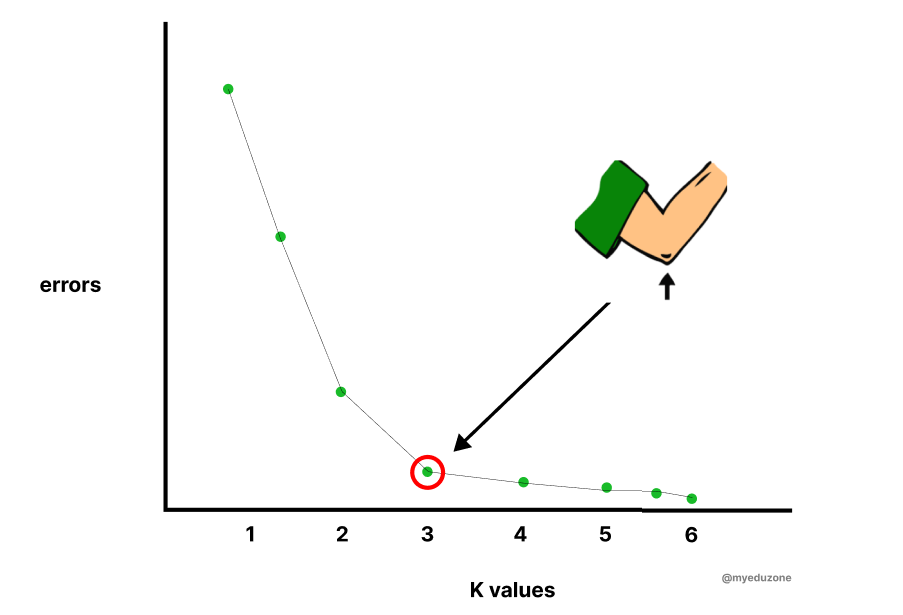

## <a id='dataset' name='dataset'>12.2 The dataset</a>


The data set we are going to use is the "Live.csv" which tells the live status of the data that generally contain video, photo, etc. Load the dataset into the environment before running the cells.

### <a id='import' name='import'>12.2.1 Loading dataset and importing libraries</a>

<a href='#top'>⇑ Table of contents</a>

In [98]:
#importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline


warnings.filterwarnings('ignore')

In [99]:
data = pd.read_csv('Live.csv')

We have imported the necessary libraries and the dataset. Now let's explore the dataset.

### <a id='eda' name='eda'>12.2.2 Exploratory Data analysis</a>

<a href='#top'>⇑ Table of contents</a>

In [100]:
data.shape

(7050, 16)

There are 7050 instances with 16 attributes. Let's see the first few rows of the dataset.

In [101]:
data.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


From the above sample data, four columns are completely having NaN values. Let's check the basic info of the dataset.

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

We have 4 attributes with float as data type 3 attributes with object as data type and 9 are int data type. There are no null values in these attributes except for **`column 1`**, **`column 2`**,**` column 3`**, and**` column 4`** which contain NaN values. Let's see more clearly whether we have missing values or not.

In [103]:
data.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

You can see that there are only 4 columns with complete null values. We can say that they are redundant columns and there is no use for the model prediction. Let's drop these columns.

In [104]:
data.drop(['Column1','Column2','Column3','Column4'],axis=1,inplace=True)

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


We have dropped those 4 columns with redundant values. There are three character variables in our data set. Let's see the frequency of the values and the count of unique values.

In [106]:
print(f' the frequency of values in status_id are\n------------------------------------\n{data["status_id"].value_counts()}')

 the frequency of values in status_id are
------------------------------------
819700534875473_957599447752247      2
819700534875473_972433889602136      2
819700534875473_981835315328660      2
819700534875473_980941638751361      2
819700534875473_978746665637525      2
                                    ..
246675545449582_264078163709320      1
246675545449582_264081010375702      1
246675545449582_264089710374832      1
246675545449582_264092513707885      1
1050855161656896_1050858841656528    1
Name: status_id, Length: 6997, dtype: int64


You can see some of the objects are repeated. That means you can find redundant data in this attribute.

In [107]:
len(data['status_id'].unique())

6997

You can see that there are 6997 unique instances out of 7050 and the remaining are redundant. Let's see other attributes also.

In [108]:
len(data['status_published'].unique())

6913

'status_published' has 6913 instances which are unique

In [109]:
data['status_type'].value_counts()

photo     4288
video     2334
status     365
link        63
Name: status_type, dtype: int64

This is our target for the model. And it has 4 values of distribution in it. So we don't have any use for the '**`status_id`**" and '**`status_published`**' attributes. Let's drop them. Here we are dropping those attributes with a maximum number of redundant data.

In [110]:
data.drop(['status_id','status_published'],axis=1,inplace=True)

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


Now we have only 1 object variable with 9 integer type attributes.

In [112]:
data.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


### <a id='split' name='split'>12.2.3 Splitting the dataset and encoding categorical variables</a>

<a href='#top'>⇑ Table of contents</a>

Let's separate the features and target variables that does not have labels.

In [113]:
X = data
y= data['status_type']

In [114]:
X.shape, y.shape

((7050, 10), (7050,))

Let's encode the categorical variables. Here in features,e we have included the target variables. Now we need to encode them. Whereas in supervised learning algorithms we'll remove the target variables from the features.

We encode these categorical variables using **`LabelEncoder`**. LabelEncoders are used for 1D arrays whereas **`OneHotEncoder`** and **`OrdinalEncoders`** are used for 2D arrays. Unlike OneHotEncoder and OrdinalEncoder, LabelEncoder will not return any dense or sparse matrix. The results are transformed to a dataframe.

In [115]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

X['status_type'] = encoder.fit_transform(X['status_type'])

In [116]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   status_type    7050 non-null   int64
 1   num_reactions  7050 non-null   int64
 2   num_comments   7050 non-null   int64
 3   num_shares     7050 non-null   int64
 4   num_likes      7050 non-null   int64
 5   num_loves      7050 non-null   int64
 6   num_wows       7050 non-null   int64
 7   num_hahas      7050 non-null   int64
 8   num_sads       7050 non-null   int64
 9   num_angrys     7050 non-null   int64
dtypes: int64(10)
memory usage: 550.9 KB


In [117]:
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


Now every attribute is an integer data type. Thanks to **`LabelEncoder`** as it has performed that encoding on the 1D array.

### <a id='feature-scaling' name='feature-scaling'>12.2.4 Feature Scaling</a>

<a href='#top'>⇑ Table of contents</a>

Let's scale the values as most of the values in the attributes are large enough so let's scale them using **`MinMaxScaler`**. The reason I have chosen MinMaxScaler over **`StandardScaler`** is that, when we use **`StandardScaler`**() we get some negative values. Instead of using **`MinMaxScaler`** try using **`StandardScaler`**() instead.

In [118]:
columns = X.columns

In [119]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X= scaler.fit_transform(X)

In [120]:
X = pd.DataFrame(X,columns=[columns])

In [121]:
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


All done!. We have cleaned and preprocessed the data. It's time to create the model to see how it's performing.

## <a id="Model-training" name='Model-training'>12.3 Model Training</a>

<a href='#top'>⇑ Table of contents</a>

We have removed redundant data and preprocessed the data. Now we'll create the K-means algorithm's model. We find KMeans in **`sklearn. cluster`**.

### <a id='model-2' name='model-2'>12.3.1 Model with 2 clusters</a>

<a href='#top'>⇑ Table of contents</a>

In [122]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,random_state=0)
kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

We need to pass **`n_clusters`** to define how many clusters we want to make. Let's see the clusters that it had made.

In [123]:
kmeans.cluster_centers_

array([[3.28506857e-01, 3.90710874e-02, 7.54854864e-04, 7.53667113e-04,
        3.85438884e-02, 2.17448568e-03, 2.43721364e-03, 1.20039760e-03,
        2.75348016e-03, 1.45313276e-03],
       [9.54921576e-01, 6.46330441e-02, 2.67028654e-02, 2.93171709e-02,
        5.71231462e-02, 4.71007076e-02, 8.18581889e-03, 9.65207685e-03,
        8.04219428e-03, 7.19501847e-03]])

- By attempting to divide samples into n groups of equal variances and minimizing a criterion called **inertia**, or within-cluster sum-of-squares, the KMeans algorithm clusters data.

- A set of N samples (X) is divided into K disjoint clusters (C) by the k-means algorithm. Each cluster is described by the mean (j) of the samples within it. The **cluster centroids** are a common term for the means.

- Selecting centroids that minimize the within-cluster sum of squared criterion, also known as **inertia**, is the goal of the K-means algorithm.



In [124]:
kmeans.inertia_

237.75726404419646

The Inertia of the model should be very low so that the model will be a good fit. The less the inertia value the better will be the model.

The inertia of the model that we got is more. So the model is not good to fit the data.

### <a id='checking' name='checking'>12.3.2 Checking the quality of weak classification by the model</a>

<a href='#top'>⇑ Table of contents</a>

Let's see whether we are getting a maximum number of predictions or not.

In [125]:
labels = kmeans.labels_

correct_labels = sum(y == labels)
print(f' {correct_labels} are correct out of {y.size}')

 0 are correct out of 7050


Well.. the model did not give any correct label. Let's see the accuracy of the model without using **`accuracy_score`**().

In [126]:
print(f'accuracy of the model: {correct_labels/float(y.size)}')

accuracy of the model: 0.0


The model is not good enough to fit the data. classification accuracy of the model is 0%. We don't find the proper k value to get the clusters. Let's find the k value using the elbow method.

### <a id='optimal' name='optimal'>12.3.3 Finding Optimal number of clusters using Elbow method</a>

<a href='#top'>⇑ Table of contents</a>

The elbow method lets us pick the right value for k based on the insights that we get from the plots.

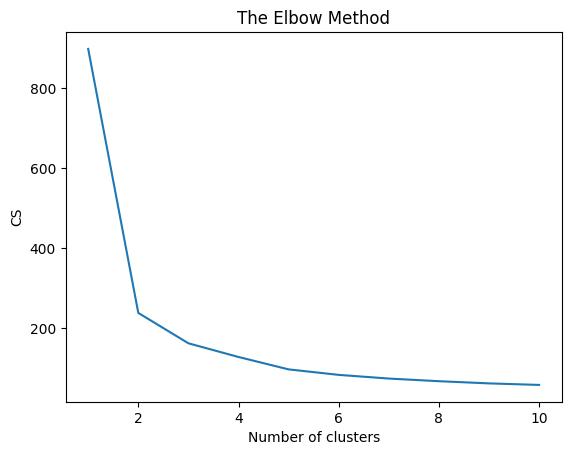

In [127]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)

plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

From the plot, we got '2' as the k value which is our number of clusters. But we got 0% accuracy with value k=2. Let's quest for the value of k.

### <a id='cluster' name='cluster'>12.3.4 Model with different clusters</a>

<a href='#top'>⇑ Table of Contents</a>

In [128]:
# model with 3 clusters

kmeans_3 = KMeans(n_clusters=3,random_state=0)
kmeans_3.fit(X)

#correct labels
labels = kmeans_3.labels_
correct_labels = sum(y == labels)
print(f'correct labels are {correct_labels} out of {y.size}')
print(f'Accuracy of the model is {correct_labels/float(y.size)}')

correct labels are 0 out of 7050
Accuracy of the model is 0.0


We got the same results with clusters=3.

In [129]:
#model with 4 clusters

kmeans_4 = KMeans(n_clusters=4, random_state=0)
kmeans_4.fit(X)

labels = kmeans_4.algorithm
correct_labels = sum(y == labels)

print(f' correct labels are {correct_labels}')
print(f' Accuracy is {correct_labels/float(y.size)}')

 correct labels are 0
 Accuracy is 0.0


We are not getting any good results after increasing the number of clusters also. So, the K-means algorithm is not a good fit for this dataset. But we have learned how to deal with KMeans and the general terms of it.

## **Summary**

In this chapter, we have learned one of the most used unsupervised learning algorithms 'KMeans'.

-  We have learned about the intuition of the KMeans.
- Then we imported the libraries and loaded our dataset.
- We performed EDA on our data set in which we have preprocessed the data.
- Later we created a model with various numbers of clusters and then plotted the elbow graph to find the good value for k.